In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
  sns.set_style(style='white')
  plt.figure(figsize=(14,9))
  ax = plt.subplot(3, 1,1)
  ax.set_title(title, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

In [3]:
vendas_por_dia = pd.read_csv('../data/time_series_vendas_por_dia.csv')

In [5]:
print("Quantidade de linhas e colunas {}".format(vendas_por_dia.shape))
print("Quantidade de valores nulos no geral {}".format(vendas_por_dia.isna().sum().sum()))
print(vendas_por_dia.head())
print(vendas_por_dia.dtypes)

Quantidade de linhas e colunas (61, 2)
Quantidade de valores nulos no geral 0
          dia  vendas
0  2018-10-01      50
1  2018-10-02      48
2  2018-10-03      56
3  2018-10-04      50
4  2018-10-05      51
dia       object
vendas     int64
dtype: object


In [6]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)
print(vendas_por_dia.dtypes)

dia       datetime64[ns]
vendas             int64
dtype: object


In [7]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
print(vendas_por_dia.head())

         dia  vendas  aumento  aceleracao
0 2018-10-01      50      NaN         NaN
1 2018-10-02      48     -2.0         NaN
2 2018-10-03      56      8.0        10.0
3 2018-10-04      50     -6.0       -14.0
4 2018-10-05      51      1.0         7.0


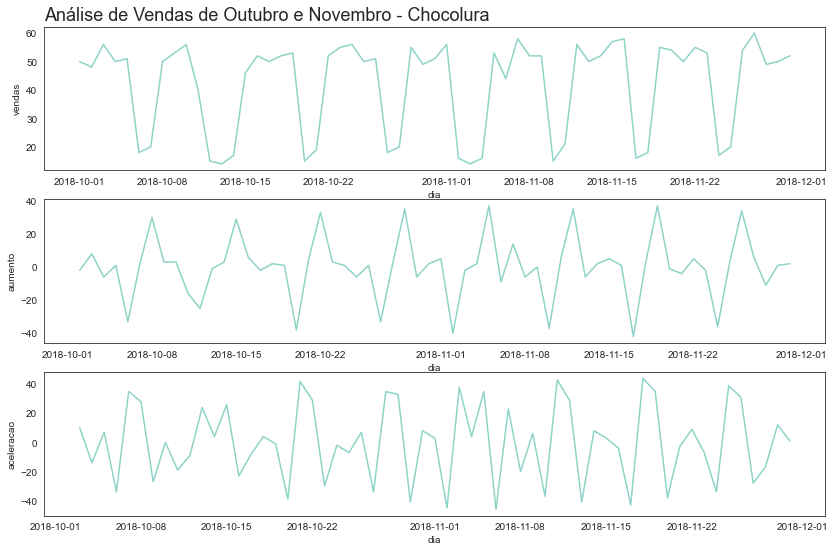

In [9]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 
                vendas_por_dia, 'Análise de Vendas de Outubro e Novembro - Chocolura')

In [39]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_of_week
vendas_por_dia.dia_da_semana.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [40]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map({
  0:"Segunda-Feira",
  1:"Terça-Feira",
  2:"Quarta-Feira",
  3:"Quinta-Feira",
  4:"Sexta-Feira",
  5:"Sabado",
  6:"Domingo",
})
vendas_por_dia.head(7)


,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feira
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


In [47]:
vendas_agrupadas_por_dia_da_semana = vendas_por_dia.groupby(by=['dia_da_semana'])[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas_por_dia_da_semana

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quinta-Feira,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feira,45.0,-7.0,-5.0
Terça-Feira,52.0,-1.0,-34.0
